### Restaurant Revenue Prediction

In [1]:
## Data Analysis and Visualization Library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Feature Engineering, Feature Selection and Modeling Library
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv data
train_data = pd.read_csv('train.csv',index_col=0, parse_dates=["Open Date"])
test_data = pd.read_csv('test.csv',index_col=0, parse_dates=["Open Date"])

### EDA (Exploratory Data Analysis)

In [3]:
train_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
test_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,
0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Open Date   137 non-null    datetime64[ns]
 1   City        137 non-null    object        
 2   City Group  137 non-null    object        
 3   Type        137 non-null    object        
 4   P1          137 non-null    int64         
 5   P2          137 non-null    float64       
 6   P3          137 non-null    float64       
 7   P4          137 non-null    float64       
 8   P5          137 non-null    int64         
 9   P6          137 non-null    int64         
 10  P7          137 non-null    int64         
 11  P8          137 non-null    int64         
 12  P9          137 non-null    int64         
 13  P10         137 non-null    int64         
 14  P11         137 non-null    int64         
 15  P12         137 non-null    int64         
 16  P13         137 non-null  

### No null values present in training and testing dataset

In [6]:
train_data.columns[train_data.isna().any()].tolist()

[]

In [7]:
test_data.columns[test_data.isna().any()].tolist()

[]

### Feature Engineering

In [8]:
# Numerical columns
num_col = train_data.select_dtypes(exclude=['object']).columns

# Categorical columns
cat_col = train_data.select_dtypes(include=['object']).columns

In [9]:
num_col

Index(['Open Date', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'],
      dtype='object')

In [10]:
cat_col

Index(['City', 'City Group', 'Type'], dtype='object')

### Target Column - revenue distribution

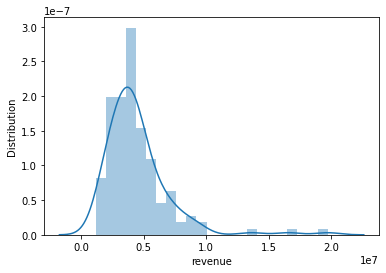

In [11]:
sns.distplot(train_data['revenue'], norm_hist=False, kde=True).set(xlabel='revenue', ylabel='Distribution');

### Distribution is mostly left skewed, so we have to cap the Outliers

In [12]:
train_data[train_data['revenue'] > 10000000 ]

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
16,2000-01-07,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,5,...,2.0,0,0,0,0,0,0,0,0,19696939.0
75,2005-10-15,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,4,...,0.0,0,0,0,0,0,0,0,0,16549064.0
99,1999-12-18,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,4,...,1.0,5,5,4,2,5,5,5,3,13575224.0


In [13]:
# Dropping outliers
train_data = train_data[train_data['revenue'] < 10000000 ]
train_data.shape

(134, 42)

### Numerical column distribution

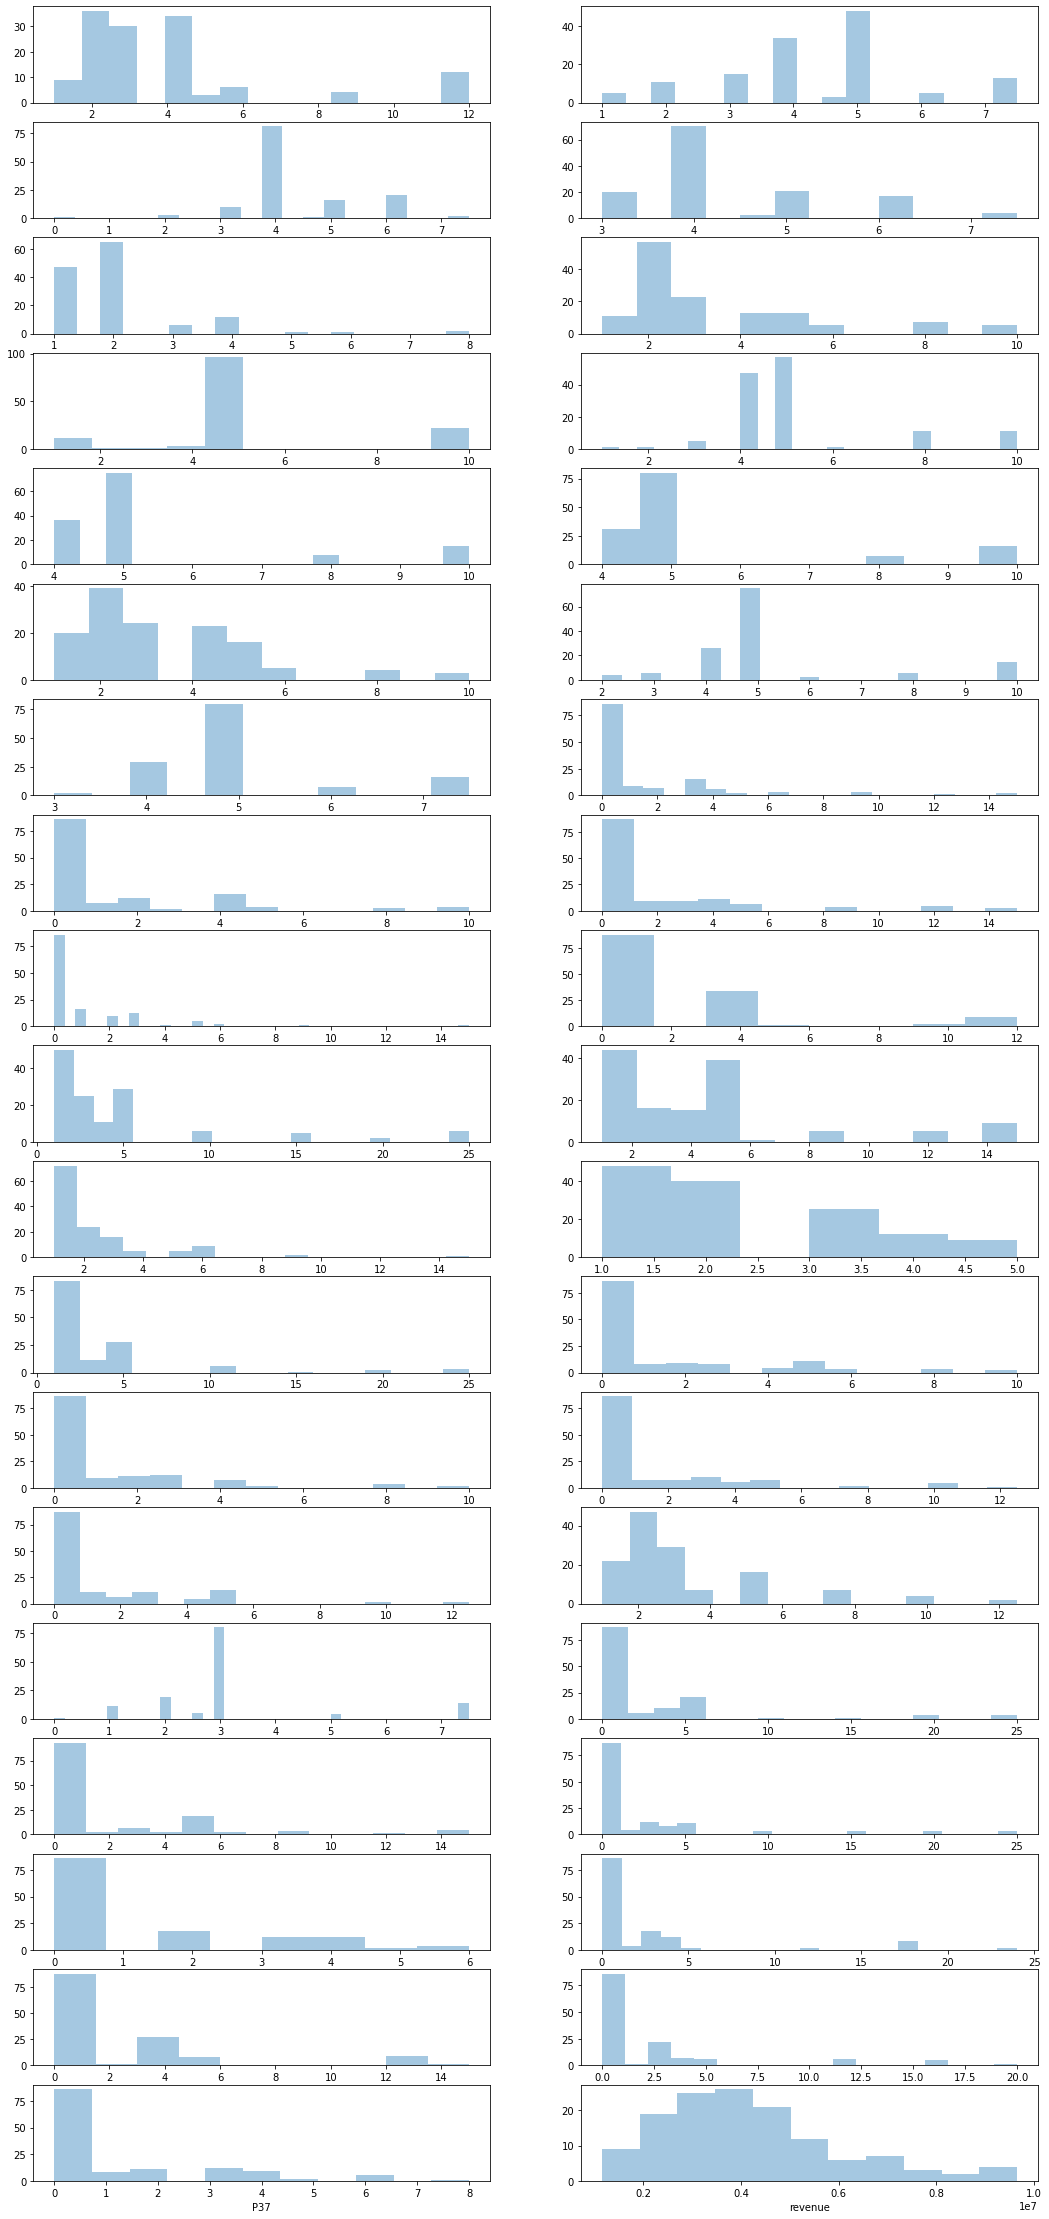

In [14]:
fig, axes = plt.subplots(nrows=19,ncols=2, figsize=(18,40))
axes = axes.flatten()
for index,col in enumerate(num_col[1:]):
    sns.distplot(train_data[col],ax=axes[index],kde_kws={'cumulative':True, 'bw':1.5},kde=False);

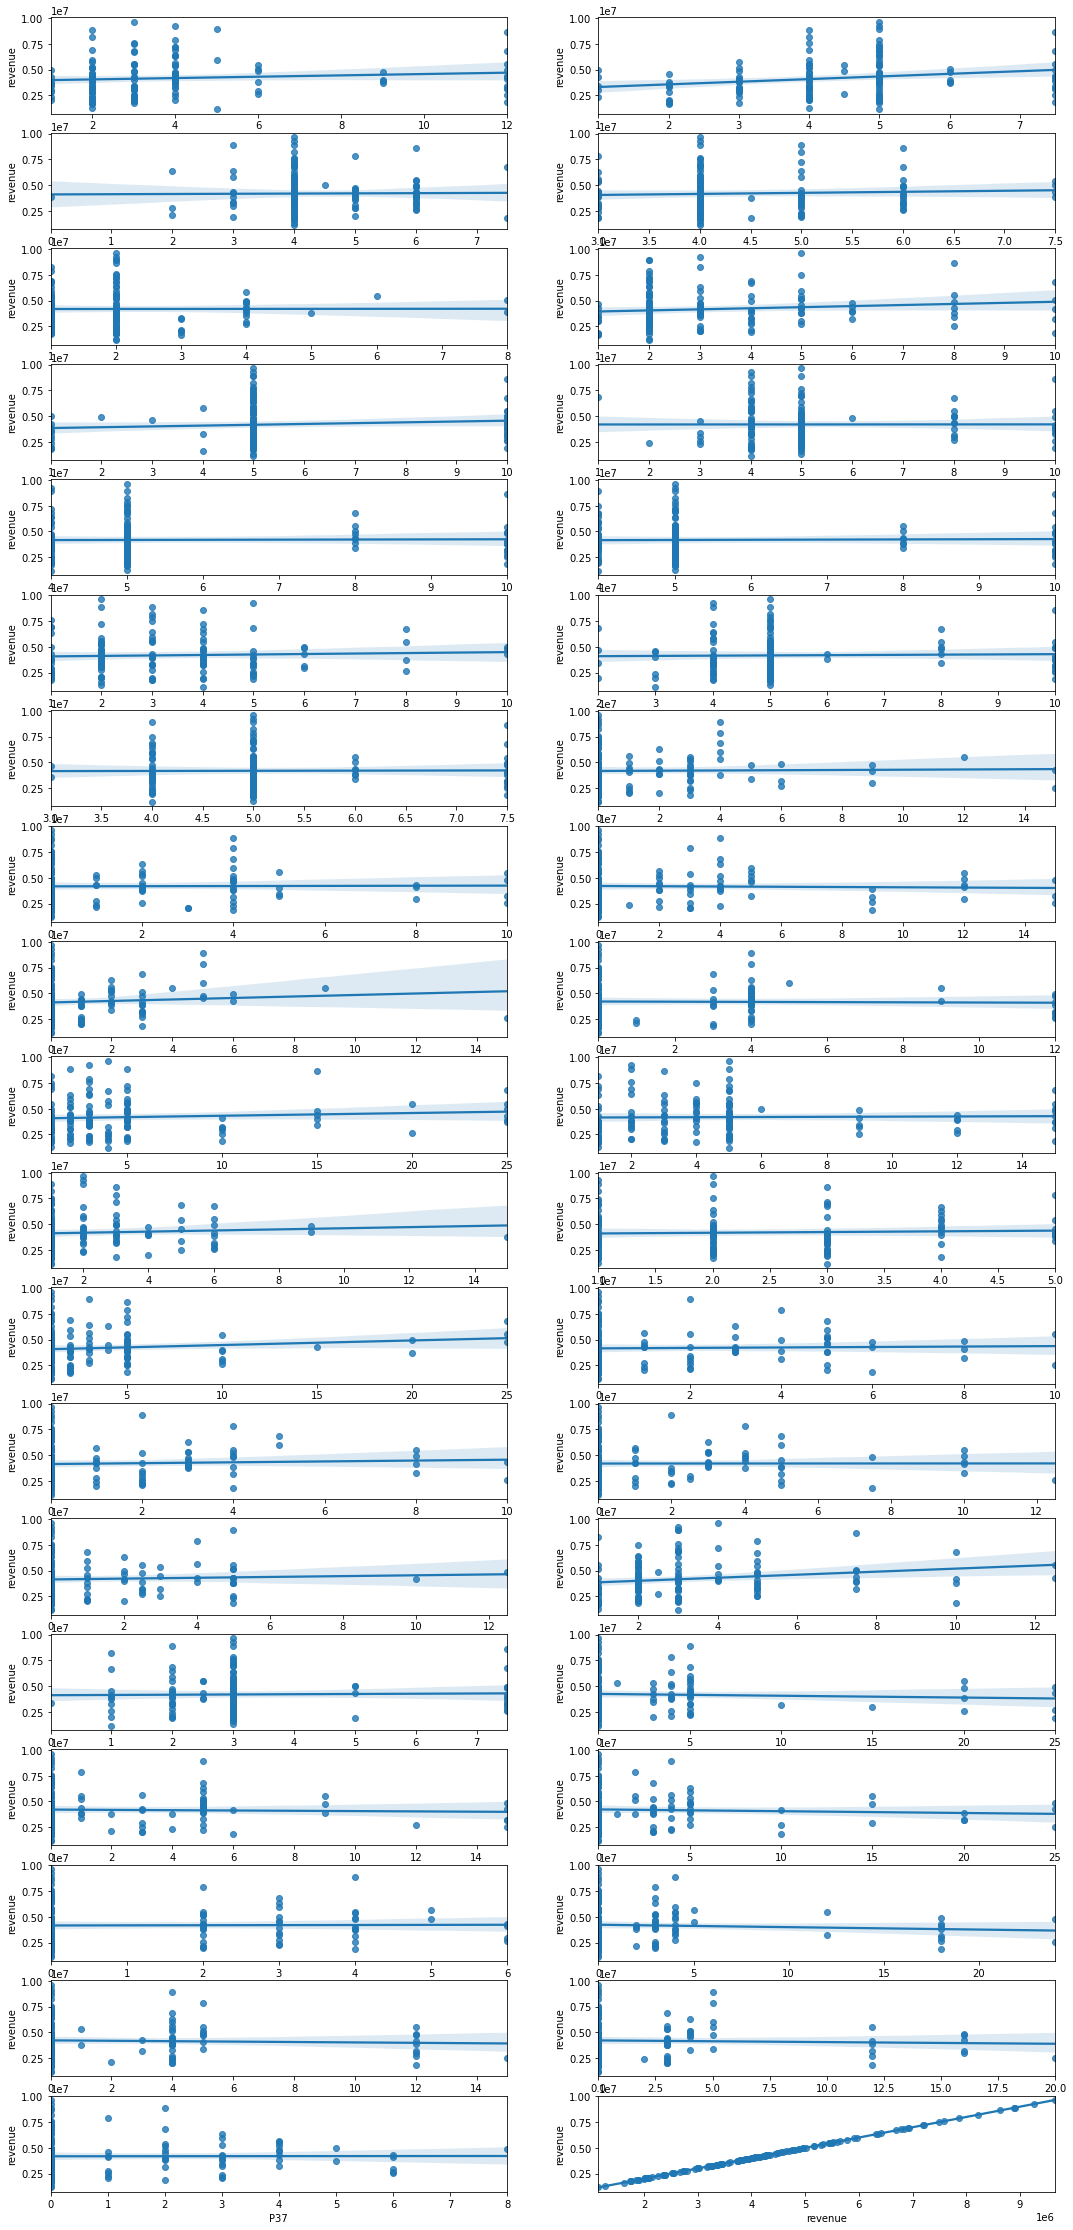

In [15]:
fig, axes = plt.subplots(nrows=19,ncols=2, figsize=(18,40))
axes = axes.flatten()
for index,col in enumerate(num_col[1:]):
    sns.regplot(x=train_data[col],y=train_data['revenue'], data = train_data, ax=axes[index]);

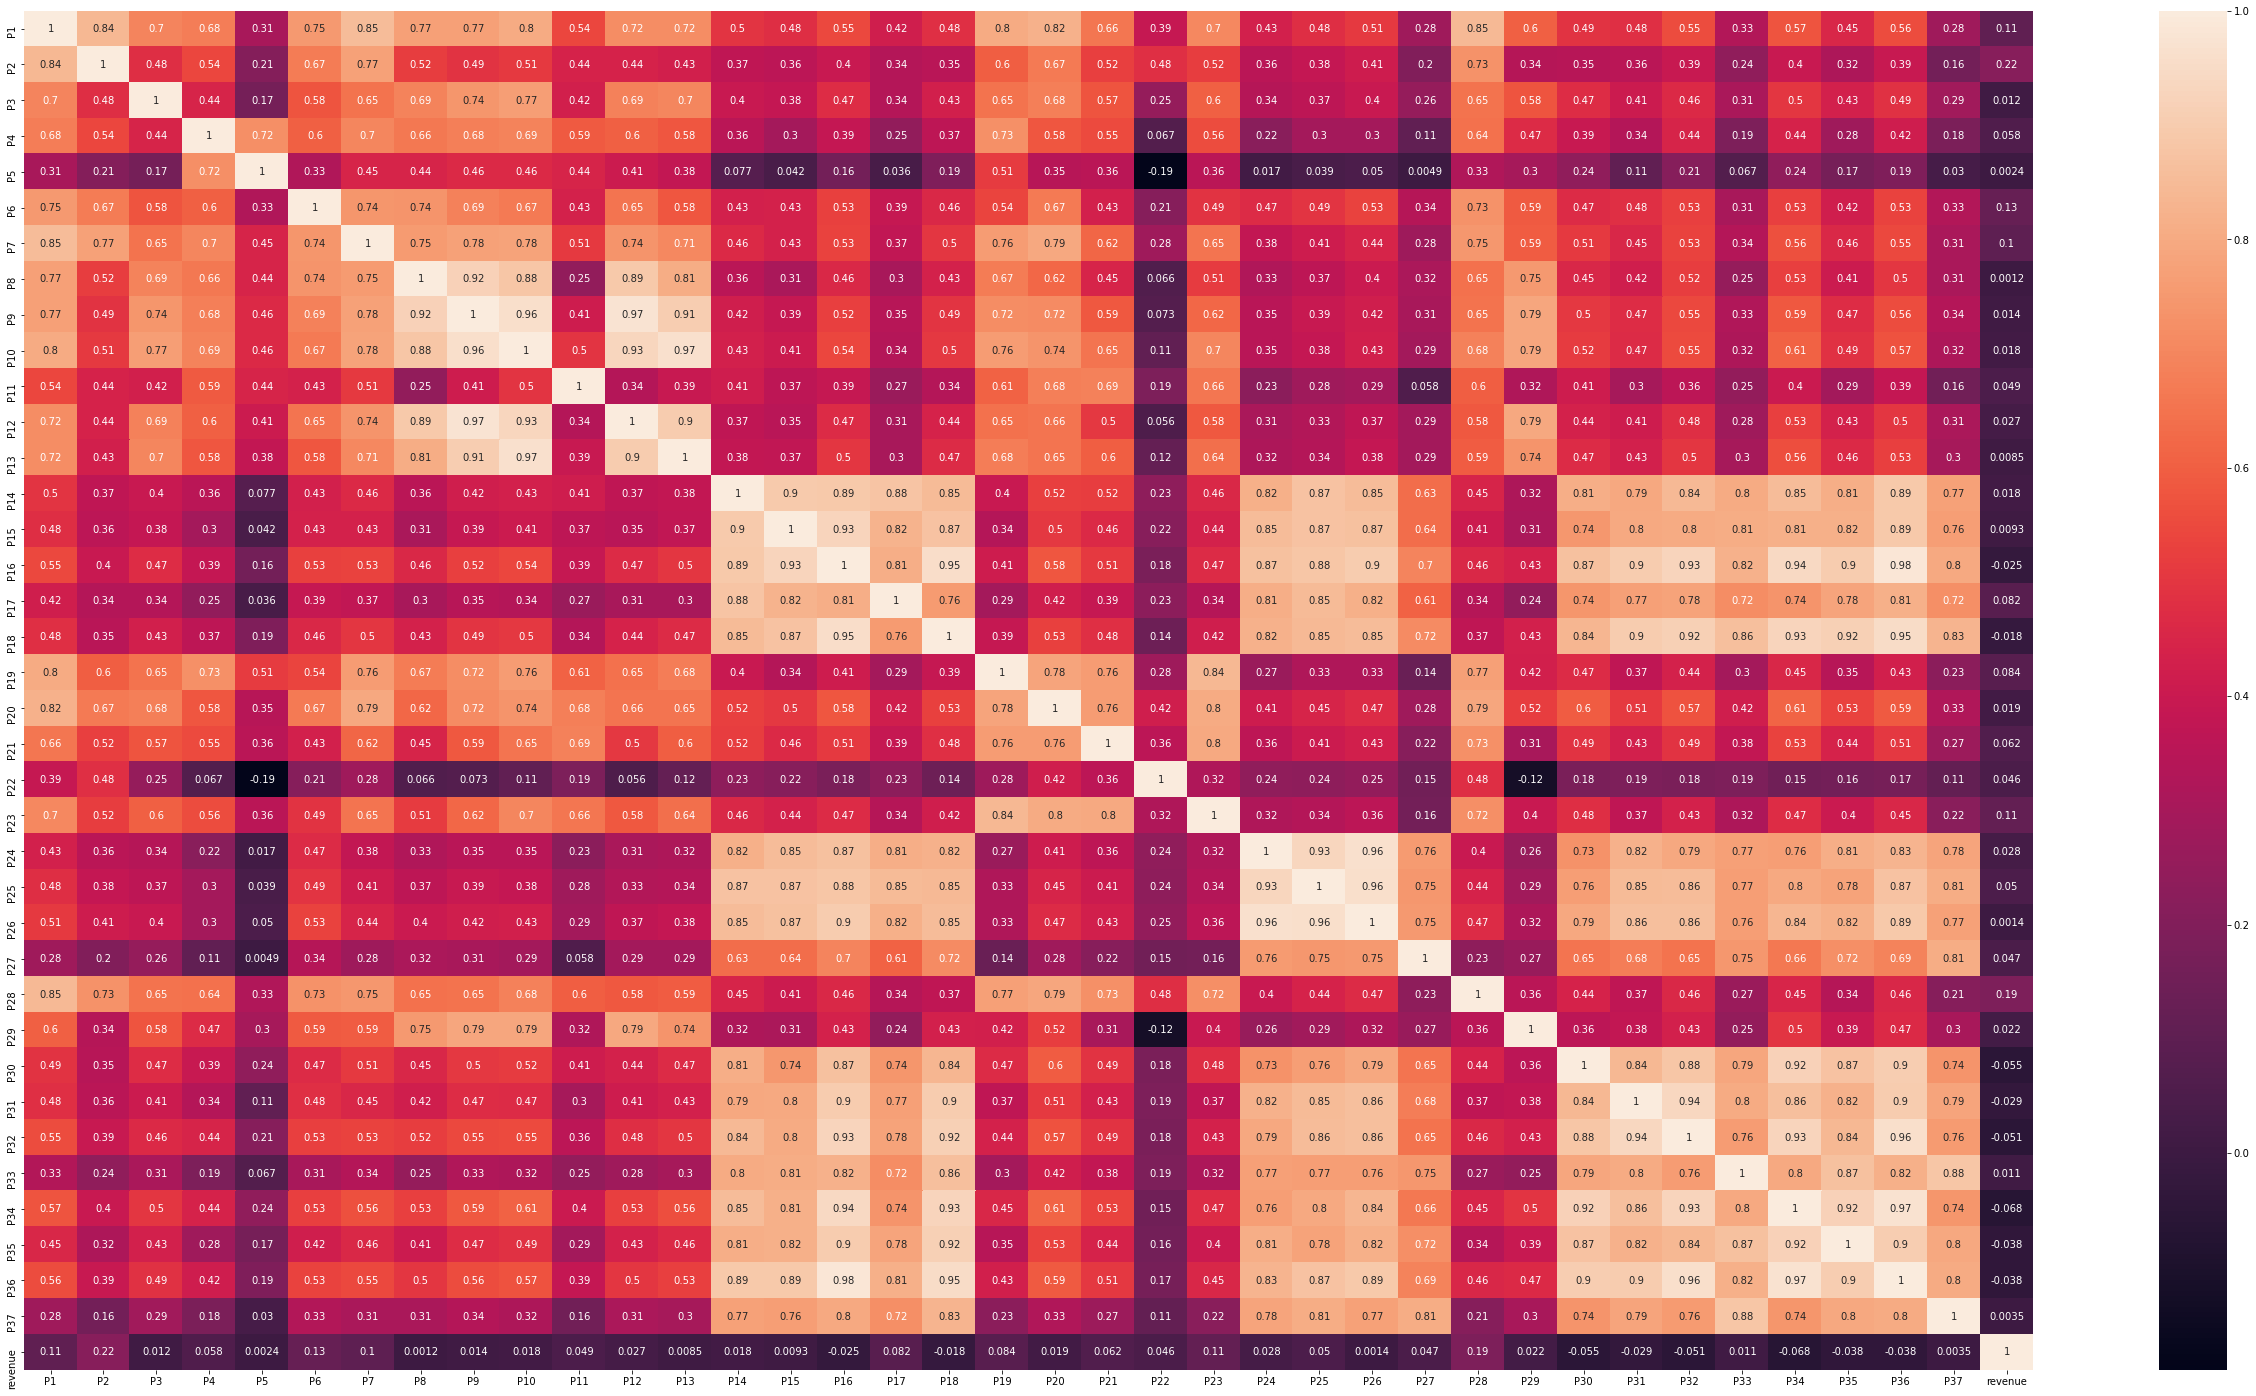

In [16]:
plt.figure(figsize=(45,25))
sns.heatmap(train_data.corr(), annot=True);

### Looks like, there is no obvious relationship of individual numerical discrete values with the Target variable

### Categorical column distribution

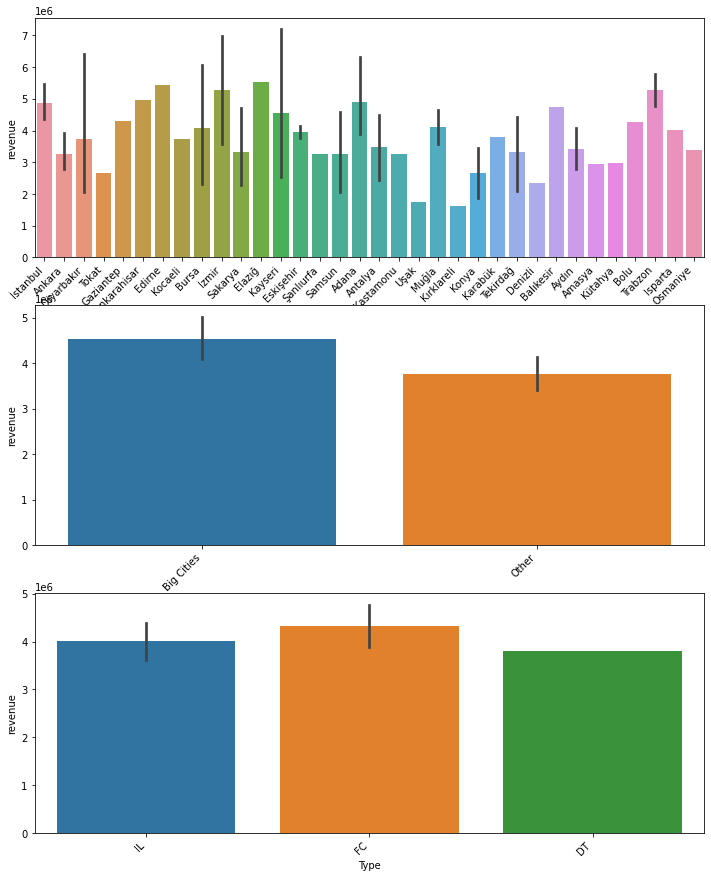

In [17]:
fig,axes = plt.subplots(nrows=3,ncols=1, figsize=(12,15))
axes = axes.flatten()
for index,col in enumerate(cat_col):
    chart = sns.barplot(x=col,y=train_data['revenue'], data=train_data, ax=axes[index])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');

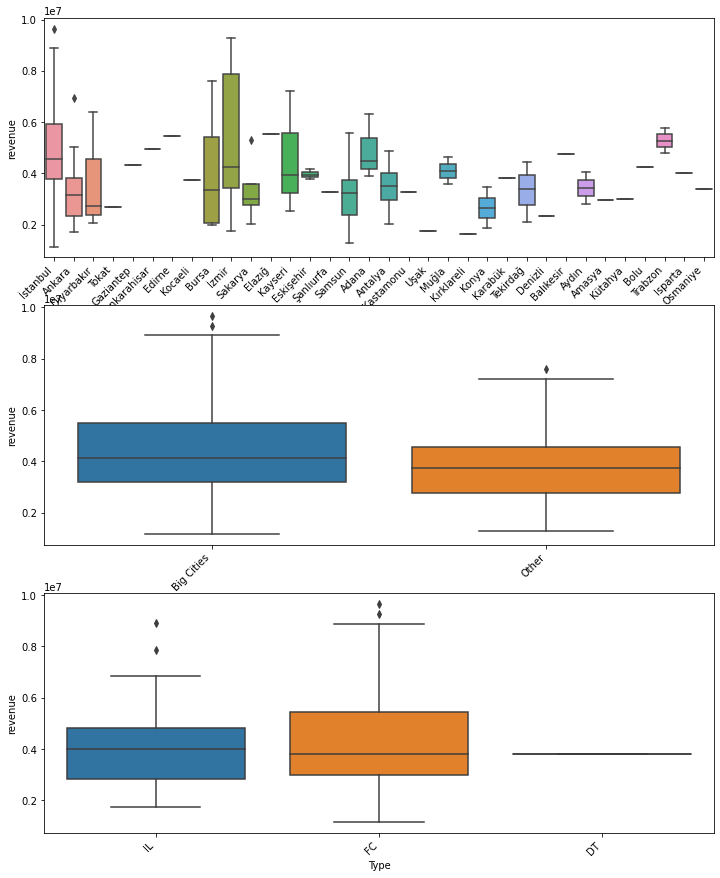

In [18]:
fig,axes = plt.subplots(nrows=3,ncols=1, figsize=(12,15))
axes = axes.flatten()
for index,col in enumerate(cat_col):
    chart = sns.boxplot(x=col,y=train_data['revenue'], data=train_data, ax=axes[index])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');

### checking for cardinality in City column

In [19]:
print(train_data.groupby('City')['City'].count() / len(train_data))

City
Adana             0.022388
Afyonkarahisar    0.007463
Amasya            0.007463
Ankara            0.141791
Antalya           0.029851
Aydın             0.014925
Balıkesir         0.007463
Bolu              0.007463
Bursa             0.037313
Denizli           0.007463
Diyarbakır        0.022388
Edirne            0.007463
Elazığ            0.007463
Eskişehir         0.022388
Gaziantep         0.007463
Isparta           0.007463
Karabük           0.007463
Kastamonu         0.007463
Kayseri           0.022388
Kocaeli           0.007463
Konya             0.014925
Kütahya           0.007463
Kırklareli        0.007463
Muğla             0.014925
Osmaniye          0.007463
Sakarya           0.029851
Samsun            0.037313
Tekirdağ          0.022388
Tokat             0.007463
Trabzon           0.014925
Uşak              0.007463
İstanbul          0.350746
İzmir             0.067164
Şanlıurfa         0.007463
Name: City, dtype: float64


In [20]:
def find_non_rare_labels(df, variable, tolerance):   
    temp = df.groupby([variable])[variable].count() / len(df)
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]   
    return non_rare

def rare_encoding(X_train, X_test, variable, tolerance):
    X_train = X_train.copy()
    X_test = X_test.copy()

    # find the most frequent category
    frequent_cat = find_non_rare_labels(X_train, variable, tolerance)

    # re-group rare labels
    X_train[variable] = np.where(X_train[variable].isin(
        frequent_cat), X_train[variable], 'Rare')
    
    X_test[variable] = np.where(X_test[variable].isin(
        frequent_cat), X_test[variable], 'Rare')

    return X_train, X_test

train_data, test_data = rare_encoding(train_data, test_data,'City',0.05)

In [21]:
train_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013-03-09,Rare,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,2012-02-02,Rare,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,2009-05-09,Rare,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


### Label Encoding

In [22]:
def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique(), 0)}


def integer_encode(train_df, test_df, variable, ordinal_mapping):

    train_df[variable] = train_df[variable].map(ordinal_mapping)
    test_df[variable] = test_df[variable].map(ordinal_mapping)

In [23]:
for variable in ['City', 'City Group','Type']:
    mappings = find_category_mappings(test_data, variable)
    integer_encode(train_data, test_data, variable, mappings)

### DateTime columns

In [24]:
from datetime import datetime as dt
def datetime_conversion(df):
    df['Open Date Year']  = df['Open Date'].dt.year
    df['Open Date Month']  = df['Open Date'].dt.month
    df['Open Date Day']  = df['Open Date'].dt.day
    all_diff = []
    for date in df["Open Date"]:
        diff = dt.now() - date
        all_diff.append(int(diff.days/1000))
    df['Days_from_open'] = pd.Series(all_diff)
    df['Days_from_open'].fillna(0, inplace=True)
    return df
    
def date_time_col(train_df,test_df):
    train_df = datetime_conversion(train_df)
    test_df = datetime_conversion(test_df)
    return train_df, test_df

In [25]:
train_data,test_data = date_time_col(train_data, test_data)

In [26]:
train_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P33,P34,P35,P36,P37,revenue,Open Date Year,Open Date Month,Open Date Day,Days_from_open
Id,,,,,,,,,,,,,,,,,,,,,
0,1999-07-17,2,1,1,4,5.0,4.0,4.0,2,2,...,5,5,4,3,4,5653753.0,1999,7,17,8.0
1,2008-02-14,1,1,0,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,6923131.0,2008,2,14,4.0
2,2013-03-09,0,0,1,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,2055379.0,2013,3,9,3.0
3,2012-02-02,0,0,1,6,4.5,6.0,6.0,4,4,...,6,18,12,12,6,2675511.0,2012,2,2,3.0
4,2009-05-09,0,0,1,3,4.0,3.0,4.0,2,2,...,2,3,4,3,3,4316715.0,2009,5,9,4.0


In [27]:
test_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,Open Date Year,Open Date Month,Open Date Day,Days_from_open
Id,,,,,,,,,,,,,,,,,,,,,
0,2011-01-22,0,0,0,1,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,2011,1,22,3
1,2011-03-18,0,0,1,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,2011,3,18,3
2,2013-10-30,1,1,0,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,2013,10,30,2
3,2013-05-06,0,0,1,2,4.0,4.0,4.0,2,3,...,0,0,0,0,0,0,2013,5,6,2
4,2013-07-31,0,0,0,2,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,2013,7,31,2


### Feature Selection

In [28]:
X_train = train_data.drop(labels=['Open Date','revenue'], axis=1)
y_train = train_data['revenue']
X_test = test_data.drop(labels=['Open Date'], axis=1)
print(X_train.shape, y_train.shape, X_test.shape)

(134, 44) (134,) (100000, 44)


### Embedded Technique: RandomForestRegressor

In [29]:
sel_ = SelectFromModel(RandomForestRegressor(n_estimators=400))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=400))

In [30]:
sel_.get_support()

array([ True, False, False,  True, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True])

In [31]:
selected_feat = X_train.columns[sel_.get_support()]
print(selected_feat, len(selected_feat))

Index(['City', 'P1', 'P6', 'P11', 'P19', 'P20', 'P21', 'P22', 'P23', 'P28',
       'Open Date Year', 'Open Date Month', 'Open Date Day', 'Days_from_open'],
      dtype='object') 14


In [32]:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)
print(X_train.shape, X_test.shape)

(134, 14) (100000, 14)


### Modeling

In [33]:
# define some handy analysis support function
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    r2_sc = r2_score(y, y_pred)
    axs[0].set_title('rmse={:.2f}, evs={:.2f}, r2_score={:.2f}'.format(rmse, evs, r2_sc))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$={:.2f}, $\sigma$={:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

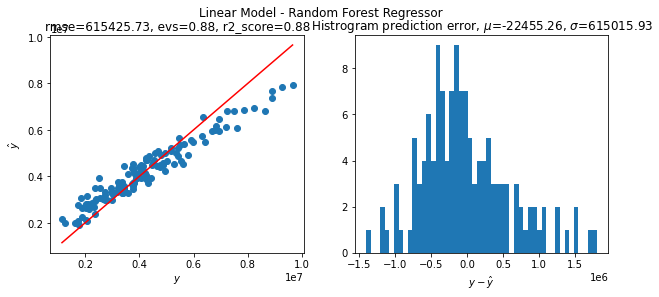

In [34]:
model1 = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("reg1", RandomForestRegressor(n_estimators=400)),
    ))

model1.fit(X_train, y_train)

y_train_pred = model1.predict(X_train)

plot_prediction_analysis(y_train, y_train_pred, title='Linear Model - Random Forest Regressor')

In [ ]:
import xgboost as xgb
model2 = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("reg2", xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)),
    ))

model2.fit(X_train, y_train)

y_train_pred = model2.predict(X_train)

plot_prediction_analysis(y_train, y_train_pred, title='Linear Model - XGBoost')